In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import norm
%run Data_manipulation.ipynb

In [2]:
def detect_anomalies_holt_winters(df, alpha=0.05):
    # Selecting the 'Close' column for anomaly detection
    data = df['Close'].values

    # Fit the Holt-Winters model
    model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=252)
    model_fit = model.fit()

    # Calculate fitted values and residuals
    fitted_values = model_fit.fittedvalues
    residuals = data - fitted_values

    # Detect anomalies
    mean_resid = np.mean(residuals)
    std_resid = np.std(residuals)
    threshold = norm.ppf(1 - alpha / 2) * std_resid
    anomalies = df[np.abs(residuals - mean_resid) > threshold]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, fitted_values, label='Fitted Values (Holt-Winters)', color='green')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly')
    plt.title('Time Series Data with Anomalies Detected using Holt-Winters')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return anomalies

# NIFTY

In [3]:
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')
NIFTY.set_index('Date', inplace=True)
NIFTY

,Close,Open,High,Low,Volume (in Billion)
Date,,,,,
2000-01-03,1592.20,1482.15,1592.90,1482.15,25.36
2000-01-04,1638.70,1594.40,1641.95,1594.40,38.79
2000-01-05,1595.80,1634.55,1635.50,1555.05,62.15
2000-01-06,1617.60,1595.80,1639.00,1595.80,51.27
2000-01-07,1613.30,1616.60,1628.25,1597.20,54.32
...,...,...,...,...,...
2024-05-27,22932.45,23038.95,23110.80,22871.20,260.01
2024-05-28,22888.15,22977.15,22998.55,22858.50,217.89
2024-05-29,22704.70,22762.75,22825.50,22685.45,269.93


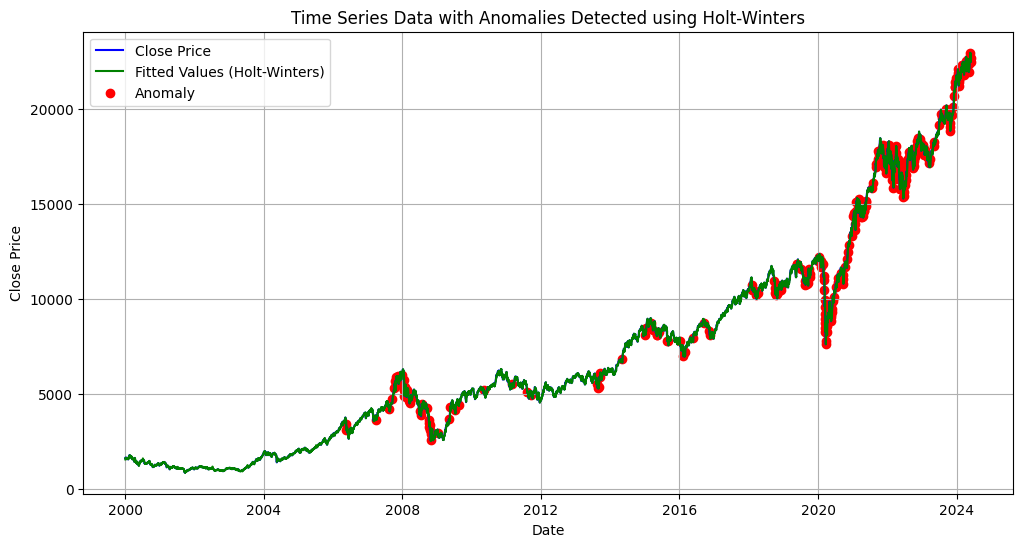

In [6]:
anomalies = detect_anomalies_holt_winters(NIFTY)

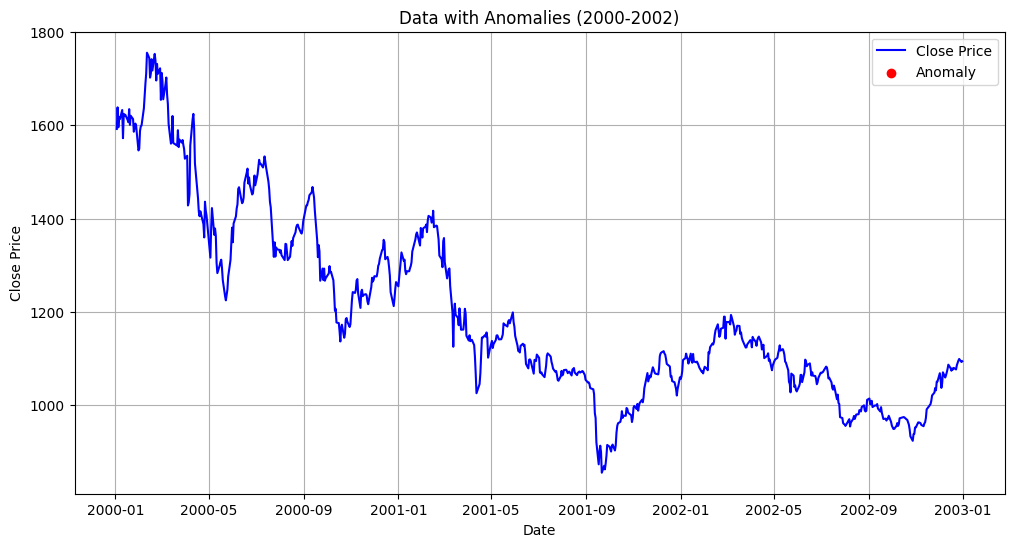

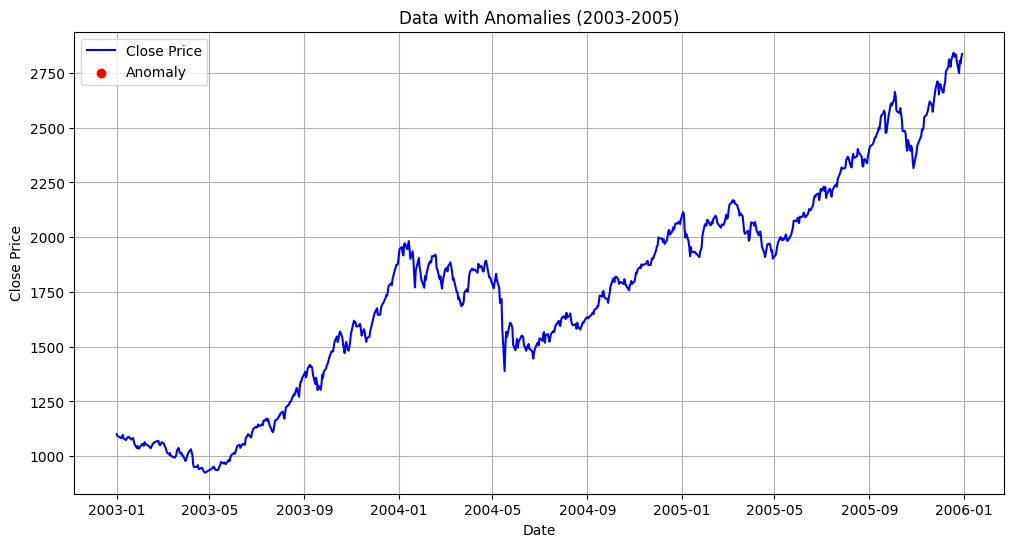

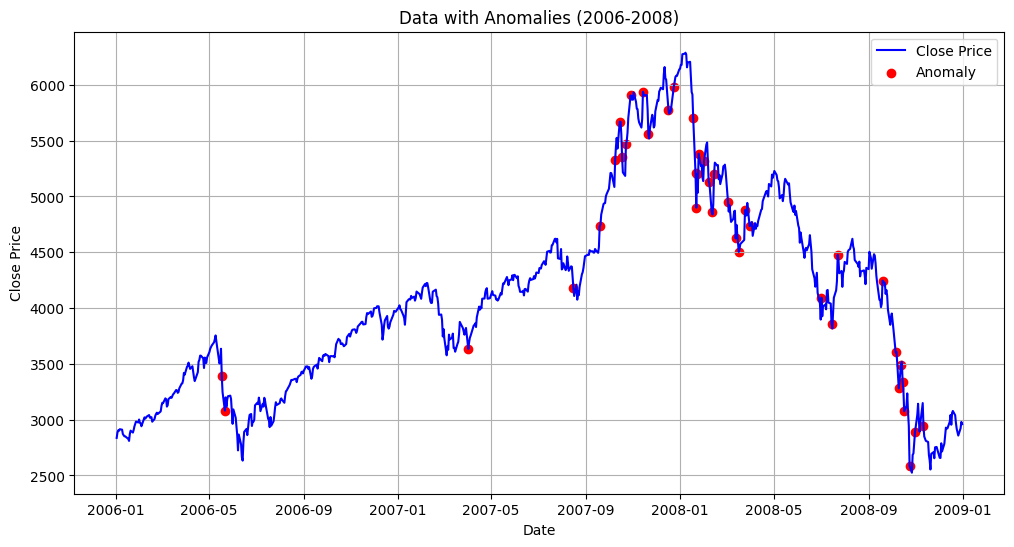

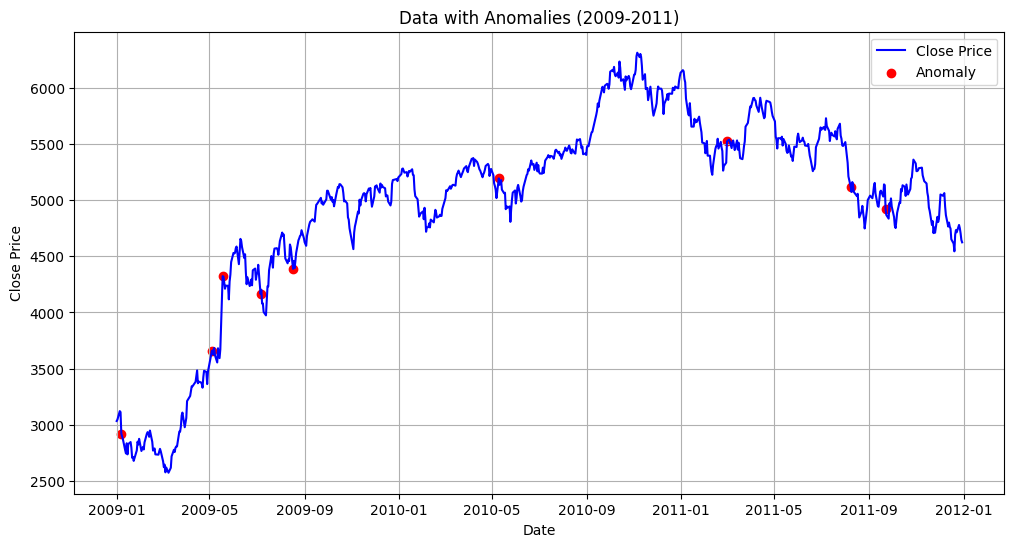

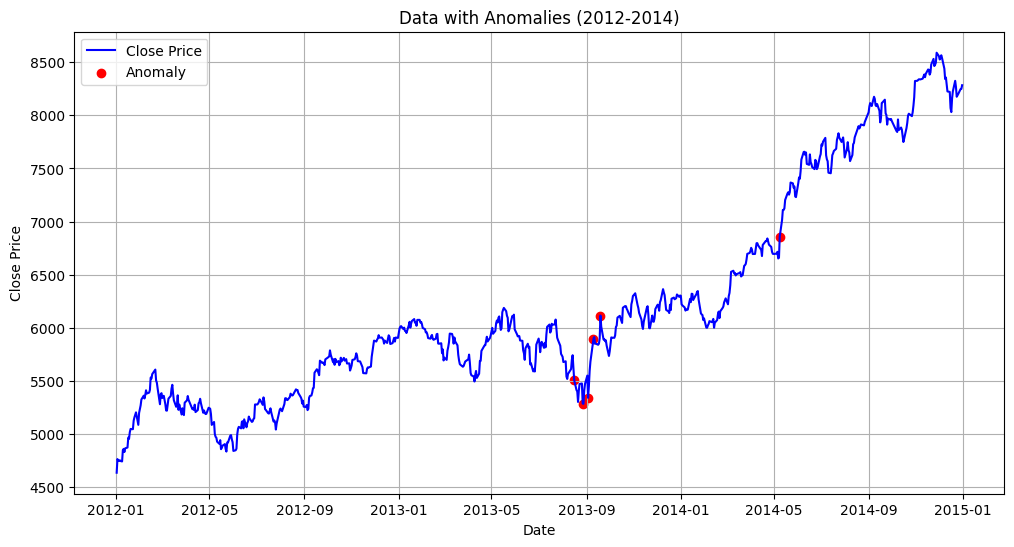

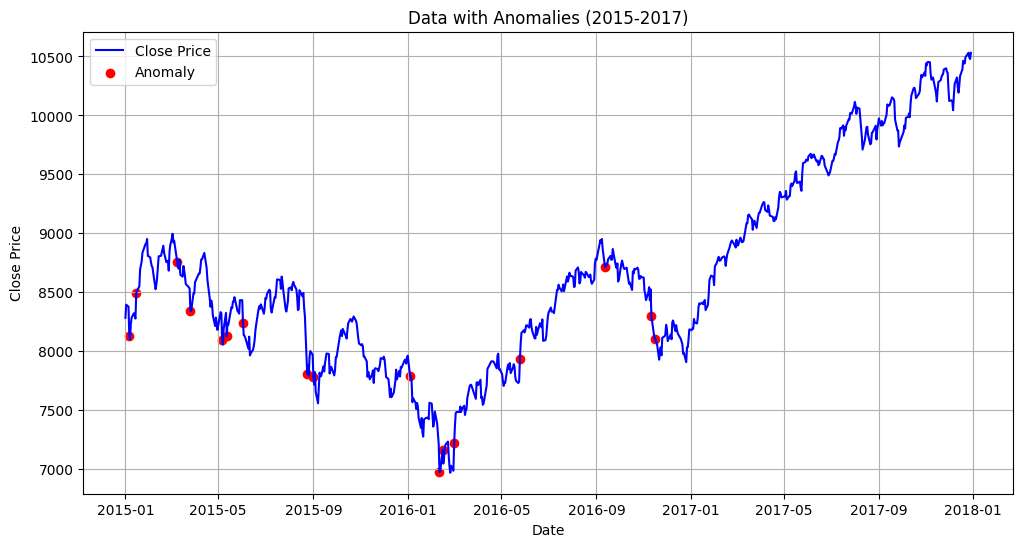

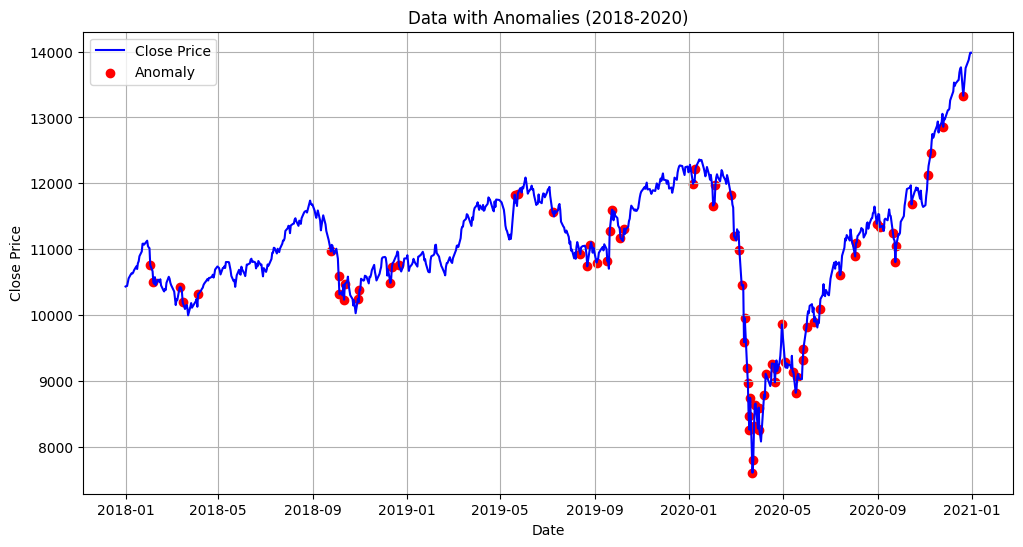

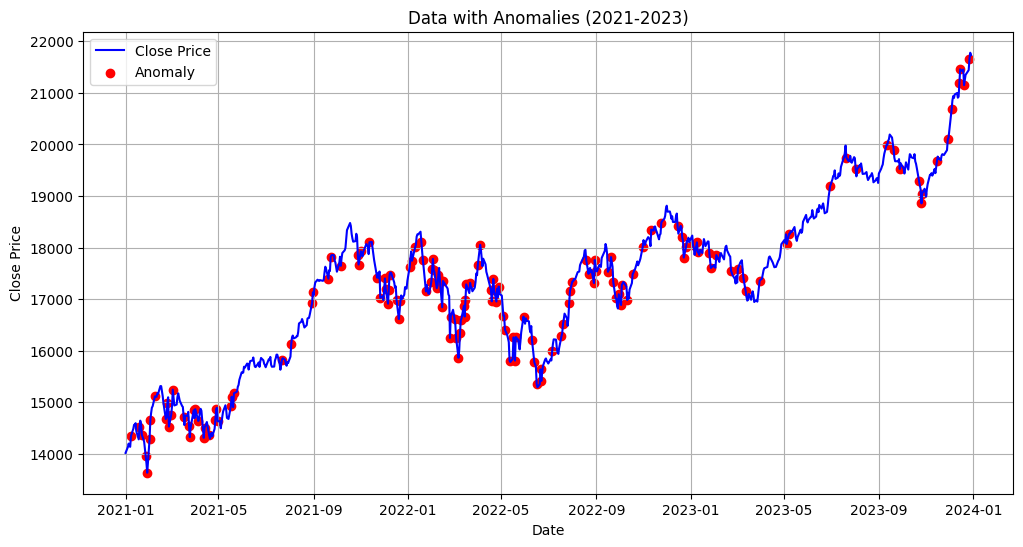

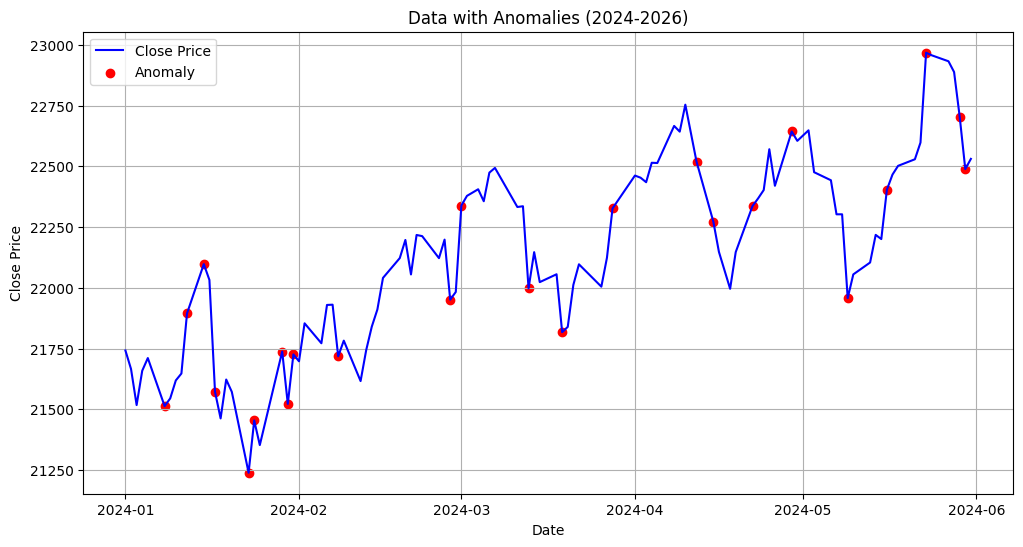

In [7]:
#anomalies.set_index(['Date'], inplace=True)
NIFTY_3 = plot_with_anomalies(NIFTY, anomalies, 3)

# IBOVESPA

In [8]:
IBOV = pd.read_csv('D:/UFG/Data collection/IBOV.csv')
IBOV['Date']= pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')
IBOV.set_index('Date', inplace=True)

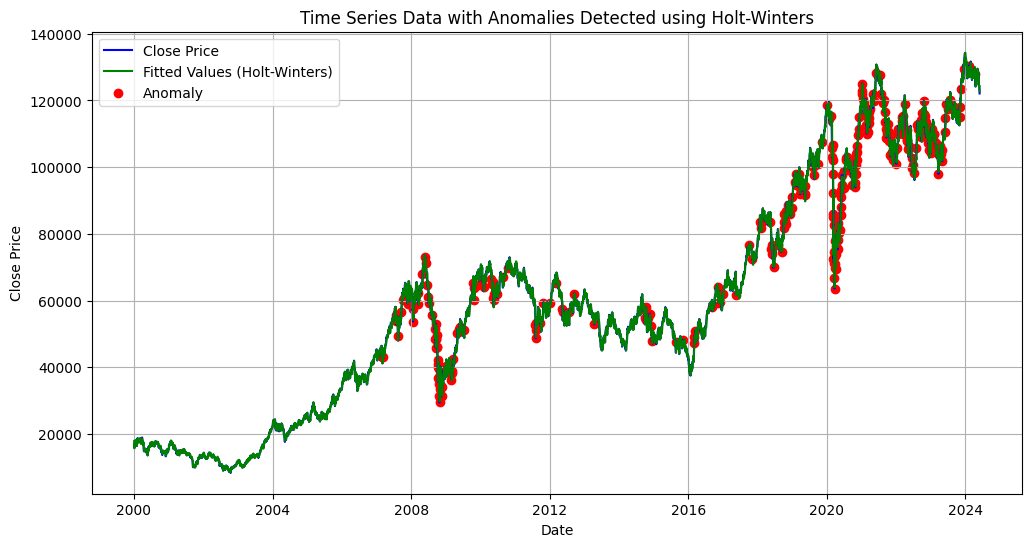

In [9]:
anomalies = detect_anomalies_holt_winters(IBOV)

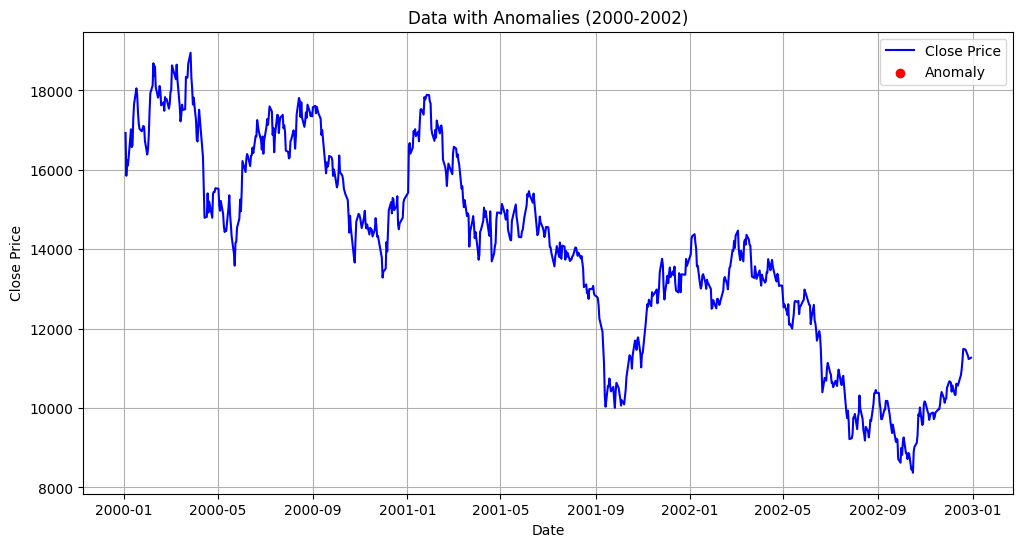

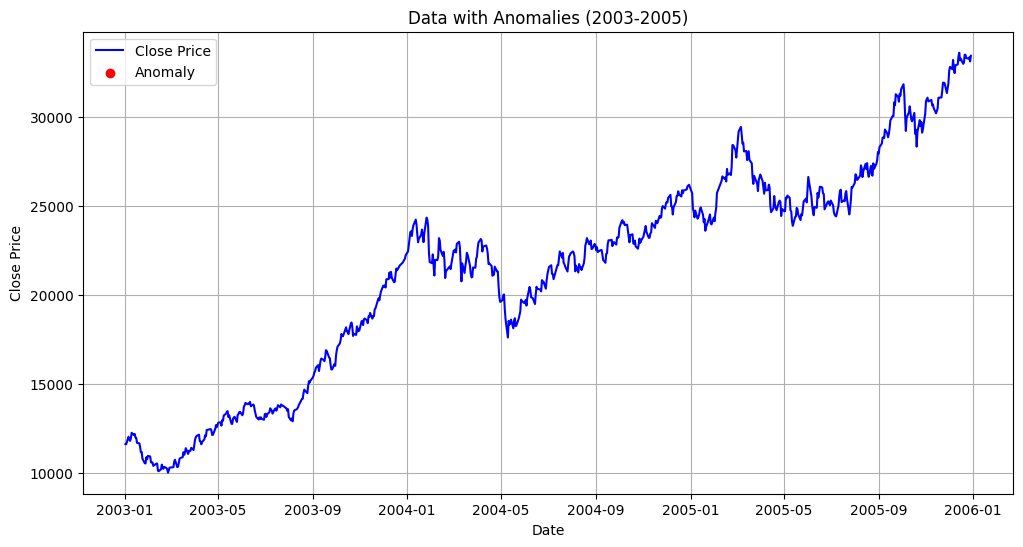

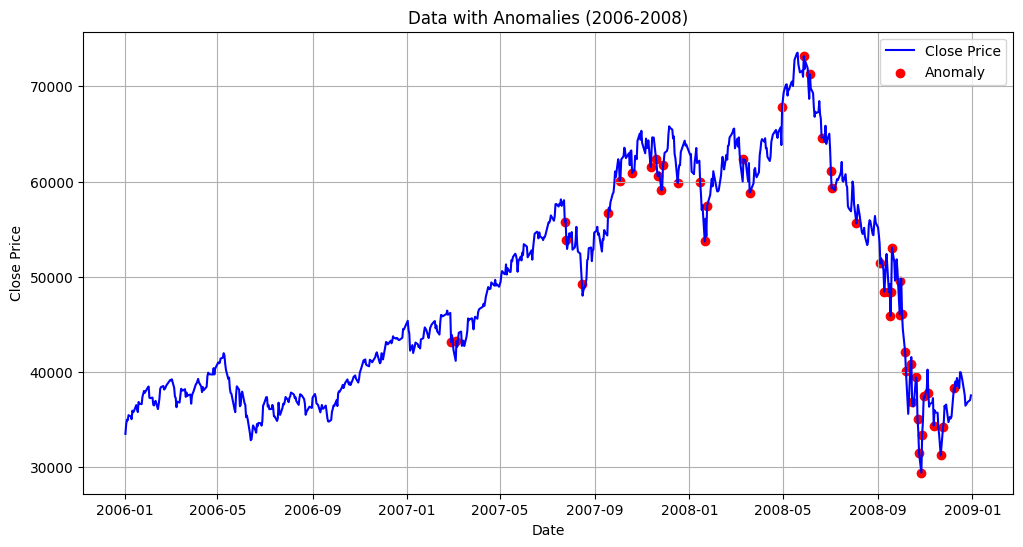

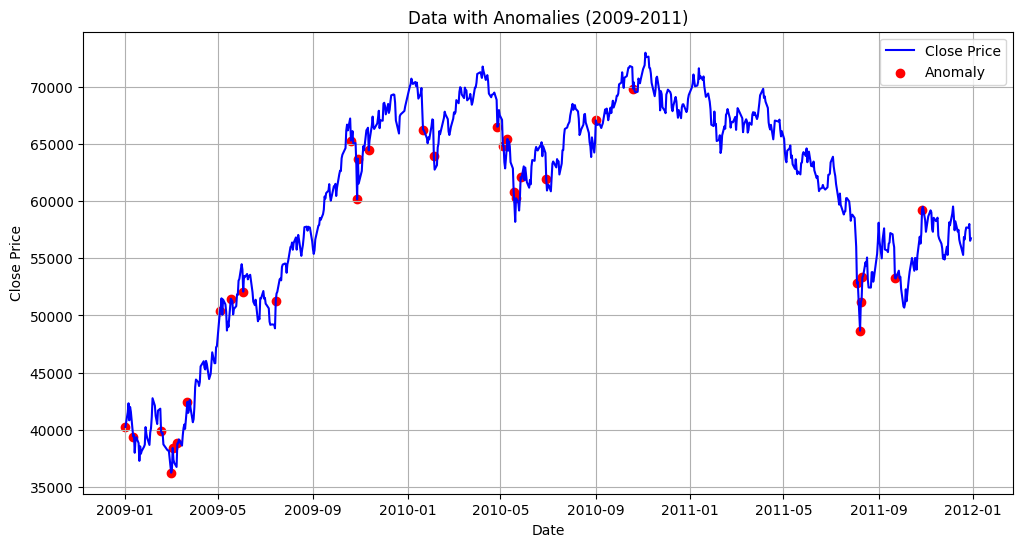

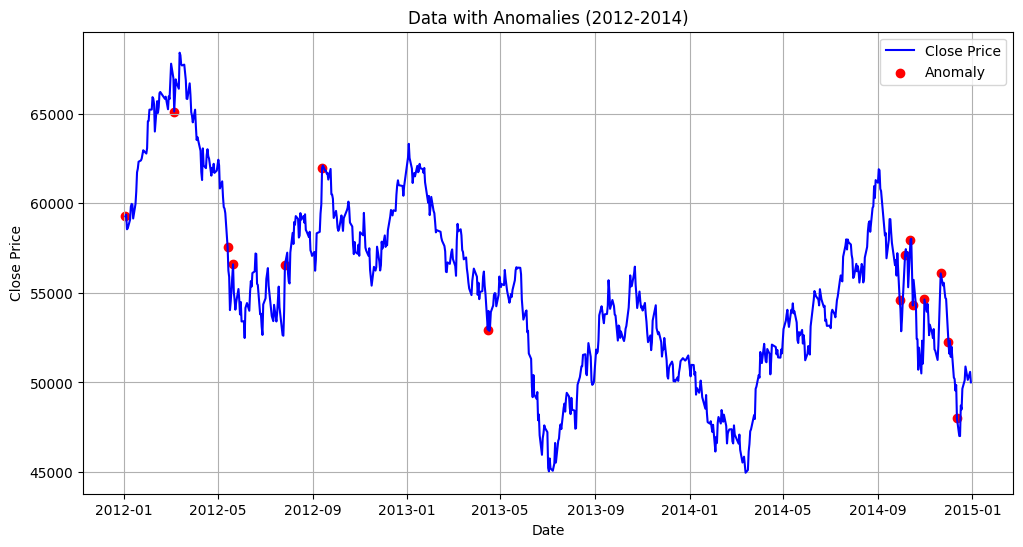

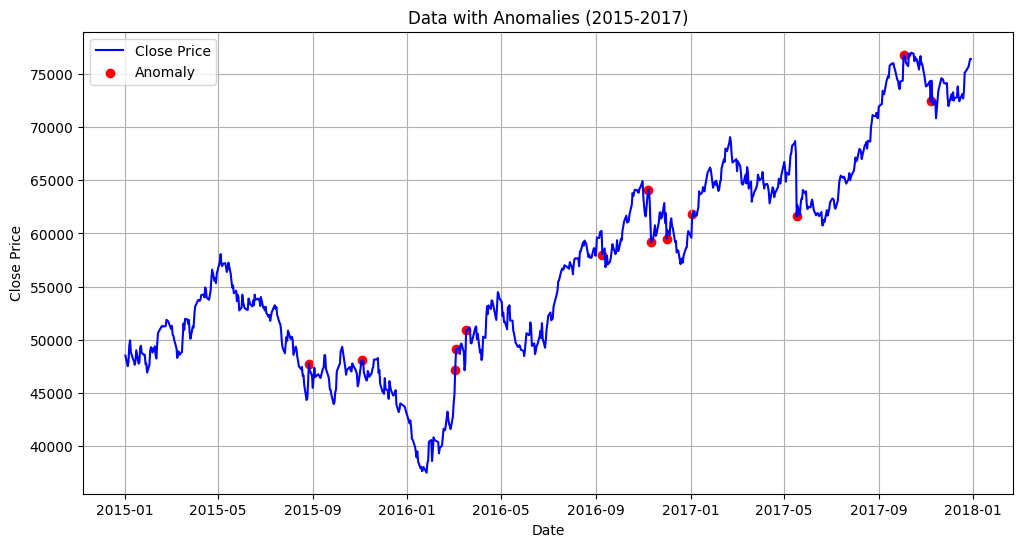

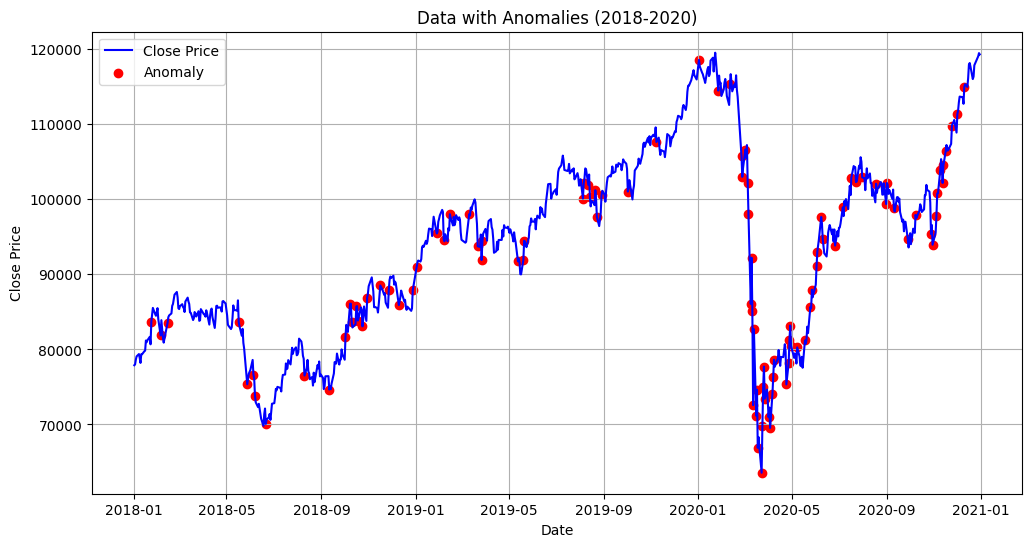

In [ ]:
IBOV_3 = plot_with_anomalies(IBOV, anomalies, 3)